In [27]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import plotly.express as px

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
# ruta = ("/content/drive/MyDrive/Proyecto_IDI2/Reporte de Anticipos.xlsx")

## Find best learning_rate

In [30]:
jsn_path = Path().resolve() / "Logs" / "general.json"
data = pd.read_json(jsn_path, lines=True).drop(["datetime"], axis=1)

### 1.0 Fomat data from json file

In [31]:
params = pd.json_normalize(data['params'])

In [32]:
df = pd.concat([data[["target"]]*-1, params], axis = 1)

In [33]:
df.neurons = df.neurons.astype(int)

### 2.0 plots

#### 2.1 Learning rate loss and Density

Text(0, 0.5, 'Error')

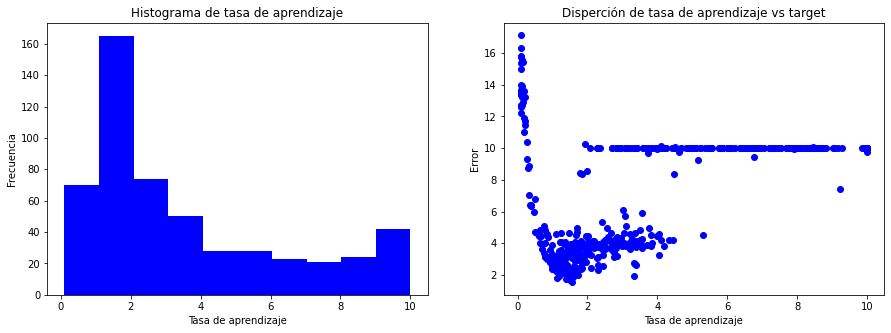

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(df.learning_rate, color="blue")
ax[1].scatter(df.learning_rate, df.target, color="blue")
ax[0].set_title("Histograma de tasa de aprendizaje")
ax[1].set_title("Disperción de tasa de aprendizaje vs target")
ax[0].set_xlabel("Tasa de aprendizaje")
ax[1].set_xlabel("Tasa de aprendizaje")
ax[0].set_ylabel("Frecuencia")
ax[1].set_ylabel("Error")

In [14]:
fig = px.scatter(df.query("target < 5"), x="learning_rate", y="target", marginal_x="histogram")
fig.show()

#### 2.2 Learning_rate vs neuron loss

In [15]:
df1 = df.query("learning_rate > 1  and learning_rate < 3 and target < 20")

In [16]:
px.scatter_3d(df1, x = "learning_rate", y = "neurons", z = "target", color = "target")

In [17]:
px.scatter(df, x="learning_rate", y="neurons", color="target", hover_data=["learning_rate"])

#### 2.3 Filtered learning rate

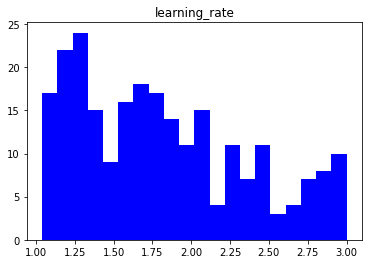

In [18]:
(
    df1 # learning_rate > 1  and learning_rate < 3 and target < 20
    .sort_values(by = "target", ascending = True)
    [["learning_rate"]]
    .hist(bins=20, color="blue", grid=False)
);

In [19]:
df1.sort_values(by = "target", ascending = True).head()

,target,learning_rate,neurons
247,1.524068,1.547200,60
129,1.650798,1.501287,64
267,1.765341,1.399260,49
357,1.803162,1.406192,44
465,1.823029,1.133776,66


## Specific (learning_rate = 1.25)

In [20]:
jsn_path = Path().resolve() / "Logs" / "neuron_n_opt.json"
data = pd.read_json(jsn_path, lines=True).drop(["datetime"], axis=1)

### 1.0 Format data from json

In [21]:
params = pd.json_normalize(data['params'])

In [22]:
df = pd.concat([data[["target"]]*-1, params], axis = 1)

In [23]:
df.neurons = df.neurons.astype(int)

### 2.0 plot

In [25]:
px.scatter(df, x="neurons", y="target", color="target", labels={"neurons": "Neuronas", "target": "Error"}, title="Error vs Neuronas")

### 3.0 Real values

In [51]:
df.sort_values(by = "target", ascending = True).drop_duplicates().head()

,target,neurons
527,1.680340,66
491,1.904736,54
490,2.032652,47
148,2.072491,42
53,2.079972,46
